## Practical 7

**Aim**: Classification of images of clothing using Tensorflow (Fashion MNIST dataset).

In [ ]:
!pip install numpy matplotlib tensorflow

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Training set dtype: uint8


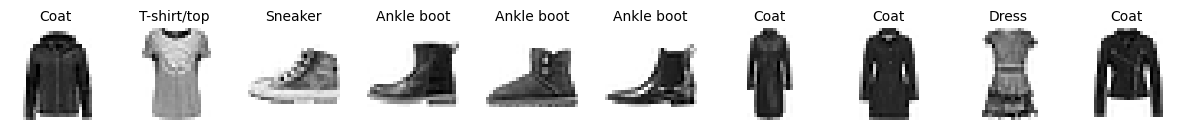

d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7874 - loss: 0.6059 - val_accuracy: 0.8564 - val_loss: 0.4091
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8651 - loss: 0.3722 - val_accuracy: 0.8716 - val_loss: 0.3559
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8755 - loss: 0.3392 - val_accuracy: 0.8810 - val_loss: 0.3235
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8887 - loss: 0.3034 - val_accuracy: 0.8790 - val_loss: 0.3338
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8959 - loss: 0.2874 - val_accuracy: 0.8878 - val_loss: 0.3217
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8997 - loss: 0.2686 - val_accuracy: 0.8900 - val_loss: 0.3098
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9033 - loss: 0.2531 - val_accuracy: 0.8896 - val_loss: 0.3009
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9107 - loss: 0.2401 - 

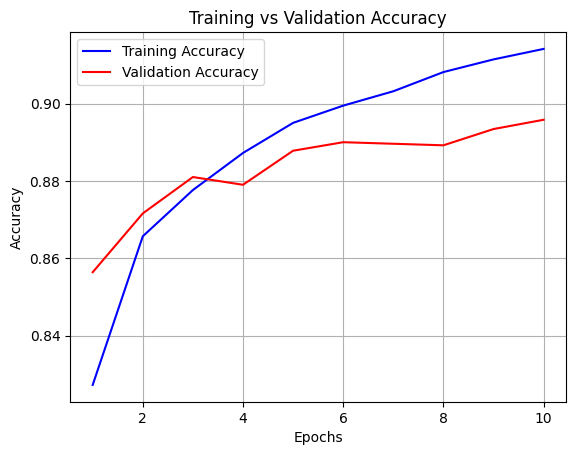

Final Training  Accuracy: 0.9213
Final Validation Accuracy: 0.8958
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


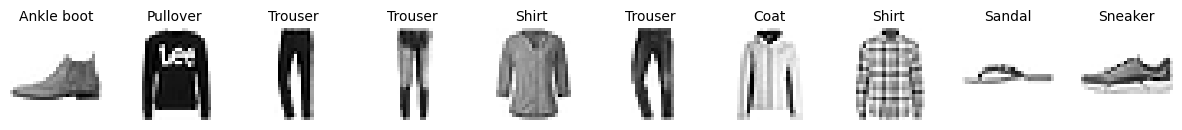

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Inspect shape and type
print("Training set shape:", X_train_full.shape)     # (60000, 28, 28)
print("Training set dtype:", X_train_full.dtype)     # uint8

# Class names for the labels 0–9
class_names = [
    "T-shirt/top", "Trouser",    "Pullover", "Dress",    "Coat",
    "Sandal",      "Shirt",      "Sneaker",  "Bag",      "Ankle boot"
]

# Normalize all images to [0,1]
X_train_full = X_train_full / 255.0
X_test        = X_test        / 255.0

# Split off a validation set from the full training data
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Plot the first 10 images from the training set
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_train[i]], fontsize=10)
plt.subplots_adjust(wspace=0.3)
plt.show()

# Build the Sequential MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),      # 784 input features
    tf.keras.layers.Dense(300, activation="relu"),      # hidden layer
    tf.keras.layers.Dense(10)                           # output logits (10 classes)
])

# Compile with Adam optimizer & sparse categorical crossentropy
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train for 10 epochs, validating on the hold-out set
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid)
)

# Plot training & validation accuracy
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'],    'b-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Final evaluation on train & validation sets
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
valid_loss, valid_acc = model.evaluate(X_valid, y_valid, verbose=0)
print(f"Final Training  Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {valid_acc:.4f}")

# Create a probability model by appending a Softmax layer
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# Generate predictions on the test set
predictions = prob_model.predict(X_test)

# Plot the first 10 test images with their predicted labels
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i], cmap="binary")
    plt.axis('off')
    plt.title(class_names[np.argmax(predictions[i])], fontsize=10)
plt.subplots_adjust(wspace=0.3)
plt.show()